**Instructions**

Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

**Load and Inspect Data:**

Use pandas to load the IMDB Movie Dataset.

Inspect the data to understand its structure and contents.

**Data Preprocessing:**

Handle missing values and convert data types as needed.

**Rating Trends Over Years:**

Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.

**Genre Popularity Analysis:**

Generate a Seaborn bar plot to compare the number of movies across different genres.

**Director’s Impact on Ratings:**

Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

**Star Power Analysis:**

Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.

**Box Plot of Genres vs. Ratings:**

Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.

**Correlation Heatmap:**

Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

In [1]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and Inspect Data
from google.colab import files
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [3]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


**Data Preprocessing**

In [6]:
# Fill Certificate with 'Not Rated'
df['Certificate'] = df['Certificate'].fillna('Not Rated')

# Fill Meta_score with mean
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

# Convert Gross to float after cleaning
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)

# Fill Gross with median
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Converting Released_Year to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(4), int64(1), object(11)
memory usage: 125.1+ KB


In [7]:
# Dropping the 1 row where Released_Year is Null or NaN
df = df.dropna(subset=['Released_Year'])

# Cofnriming that all missing values are handled
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


**Rating Trends Over Years (Line Plot)**

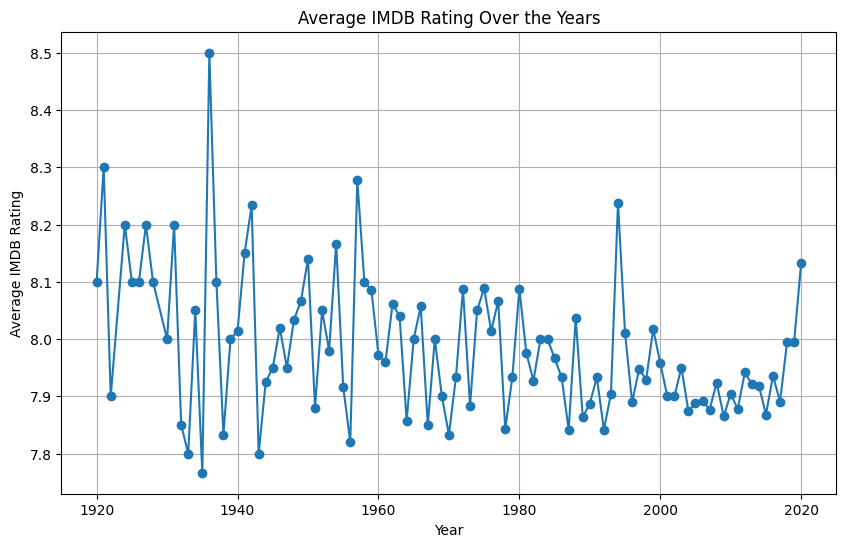

In [8]:
# Average rating per year
ratings_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(10,6))
plt.plot(ratings_per_year.index, ratings_per_year.values, marker='o')
plt.title('Average IMDB Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()

**Genre Popularity (Bar Plot)**

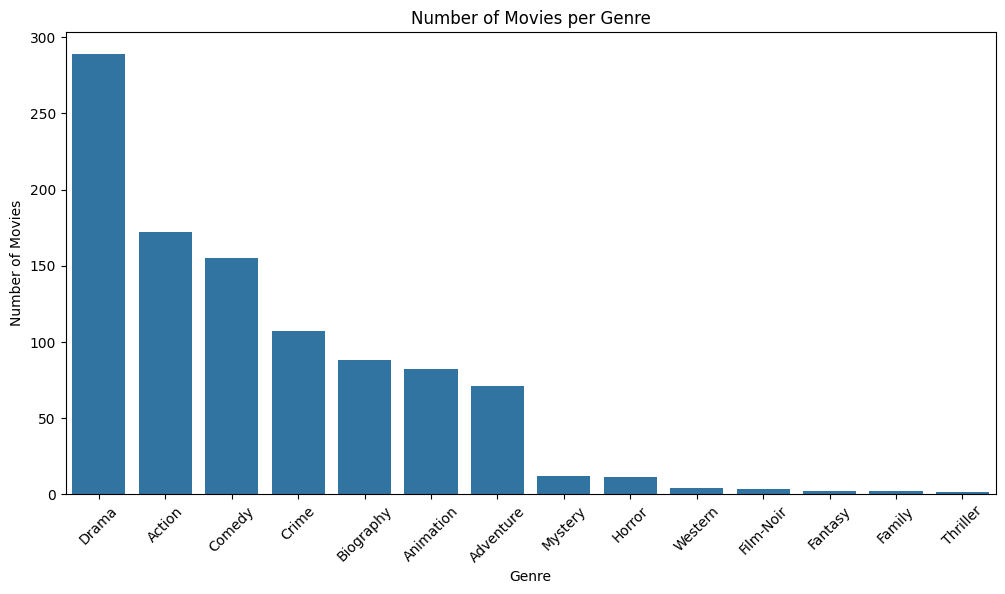

In [9]:
# Count of movies per genre (taking the first listed genre for movies with multiple genres)
df['Main_Genre'] = df['Genre'].str.split(',').str[0]
genre_counts = df['Main_Genre'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Director's Impact on Ratings (Scatter Plot)**

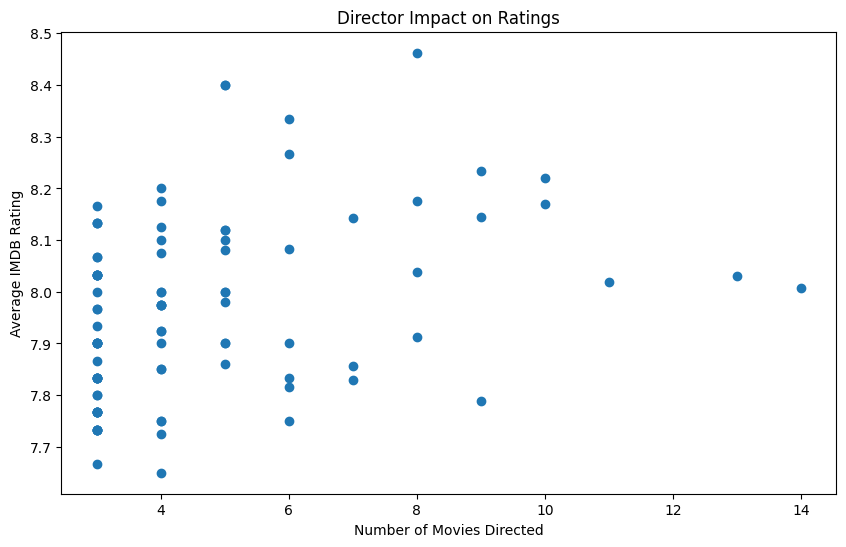

In [12]:
# Average rating per director (with at least 3 movies) to avoid hit 1 hit wonder or 1 hell of a flop
director_avg = df.groupby('Director').agg({'IMDB_Rating': 'mean', 'Series_Title': 'count'})
director_avg = director_avg[director_avg['Series_Title'] >=3]

plt.figure(figsize=(10,6))
plt.scatter(director_avg['Series_Title'], director_avg['IMDB_Rating'])
plt.title('Director Impact on Ratings')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average IMDB Rating')
plt.show()

**Star Power Analysis (Pairplot)**

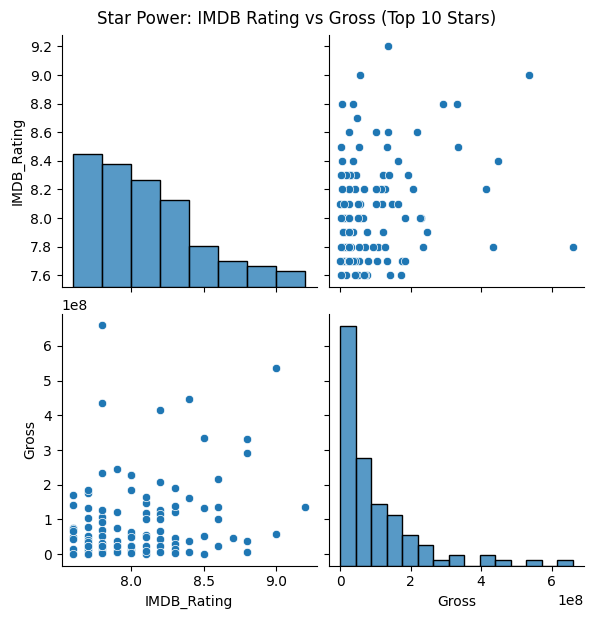

In [15]:
# Combine all star columns into one long series
all_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])

# Get top 10 most frequent stars
top_stars = all_stars.value_counts().head(10).index

# Filter the dataframe to include rows with any top star
star_data = df[
    df['Star1'].isin(top_stars) |
    df['Star2'].isin(top_stars) |
    df['Star3'].isin(top_stars) |
    df['Star4'].isin(top_stars)
]

# Plot pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(star_data, vars=['IMDB_Rating', 'Gross'], height=3)
plt.suptitle('Star Power: IMDB Rating vs Gross (Top 10 Stars)', y=1.02)
plt.show()

**Box Plot of Genres vs. Ratings**

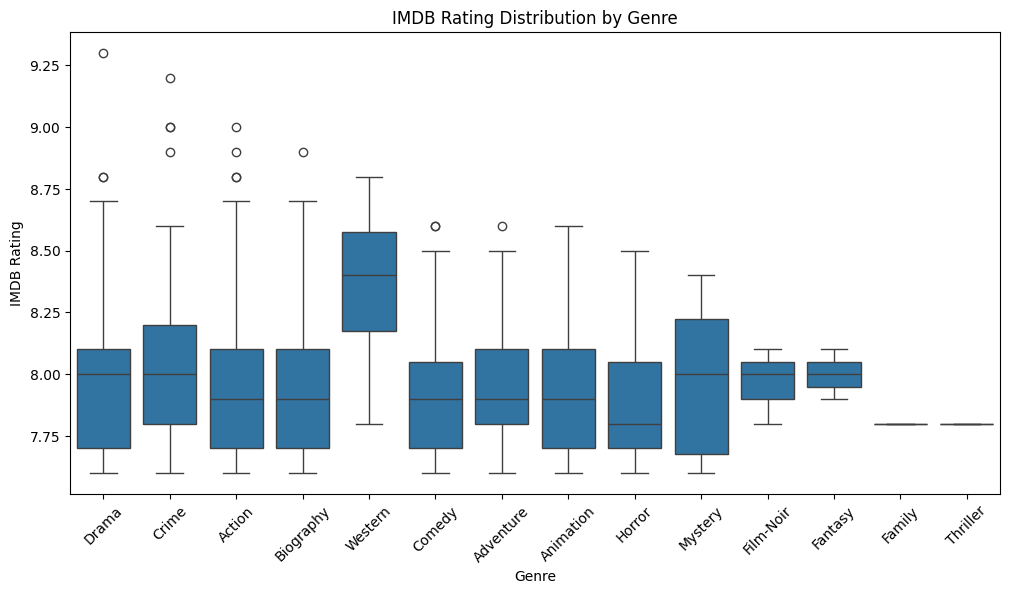

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Main_Genre', y='IMDB_Rating')
plt.title('IMDB Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)
plt.show()

**Correlation Heatmap**

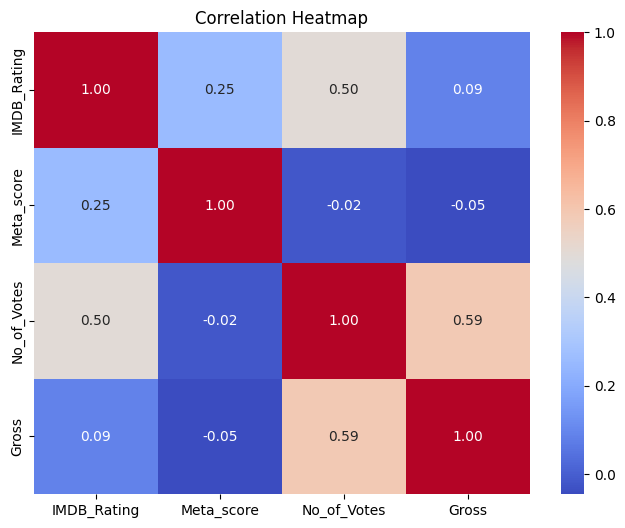

In [18]:
# Selecting relevant numeric columns
corr_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()